# Ensemble

Todo:

- Remove max evals here - it doesn't work
- Old dates with zeros in data can lead to many errors
- required date not in csv/data source? data validation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import mlflow
import os

from datetime import datetime, timedelta

from nb_utils import train_eval_plot_ensemble

In [3]:
with open('../config/sample_homogeneous_train_config.json') as f_train, \
    open('../config/sample_homogeneous_test_config.json') as f_test, \
    open('../config/sample_homogeneous_forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

In [4]:
with open('mlflow_credentials.json') as f_cred:
    mlflow_credentials = json.load(f_cred)

In [5]:
os.environ['MLFLOW_TRACKING_USERNAME'] = mlflow_credentials['username']
os.environ['MLFLOW_TRACKING_PASSWORD'] = mlflow_credentials['password']

mlflow.set_tracking_uri("http://ec2-54-175-207-176.compute-1.amazonaws.com")
mlflow.set_experiment("SEIHRD_ENSEMBLE_V0")

In [6]:
model_class = 'homogeneous_ensemble'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

In [7]:
current_day = datetime.now().date() - timedelta(4) # Forecast starts from the day after current day
forecast_length = 30 # Length of forecast interval (days)

### Inputs to train-eval-plot

In [8]:
region = ['delhi']
region_type = 'state'

current_day = datetime.now().date() - timedelta(40)
forecast_length = 30

name_prefix = region

### Train eval plot

100%|██████████| 100/100 [00:09<00:00, 10.39trial/s, best loss: 6.4374850285361] 
Best fit: {'beta': 19.965949776352158}
Best Loss: 6.4374850285361
t = 15.90
t = 15.90
100%|██████████| 100/100 [00:09<00:00, 10.91trial/s, best loss: 10.91448393589422]
Best fit: {'beta': 7.059310623259237}
Best Loss: 10.91448393589422


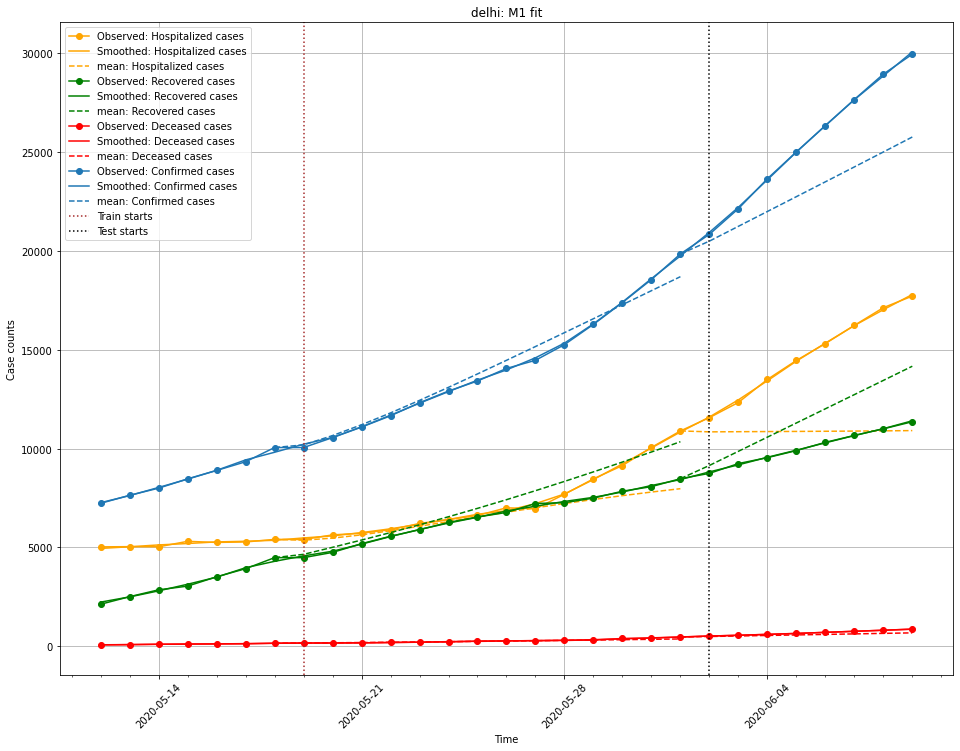

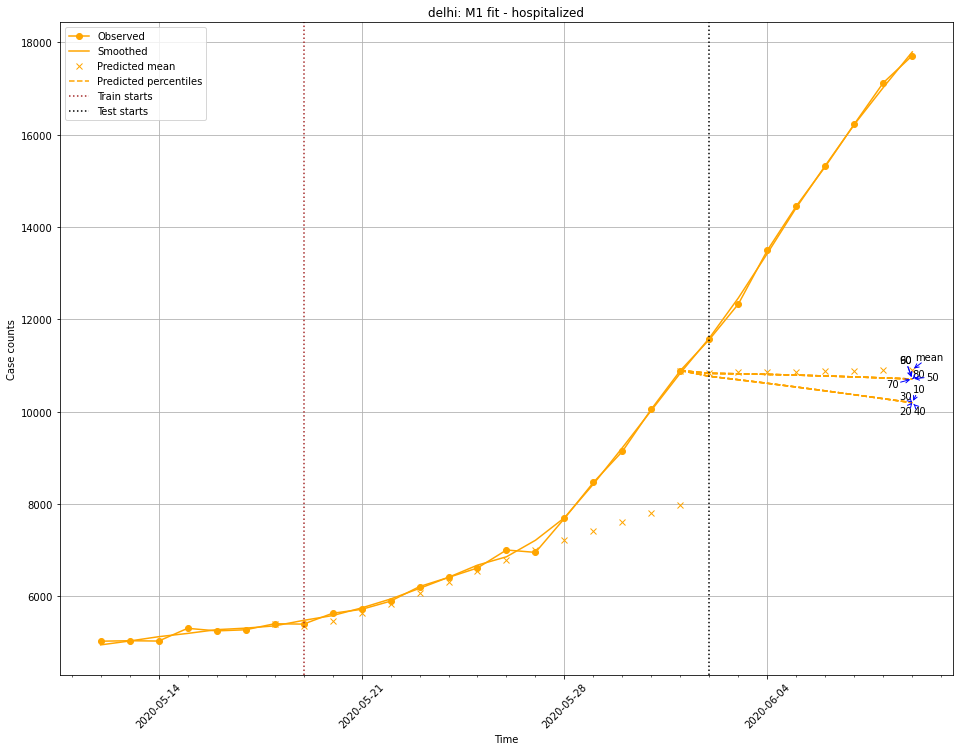

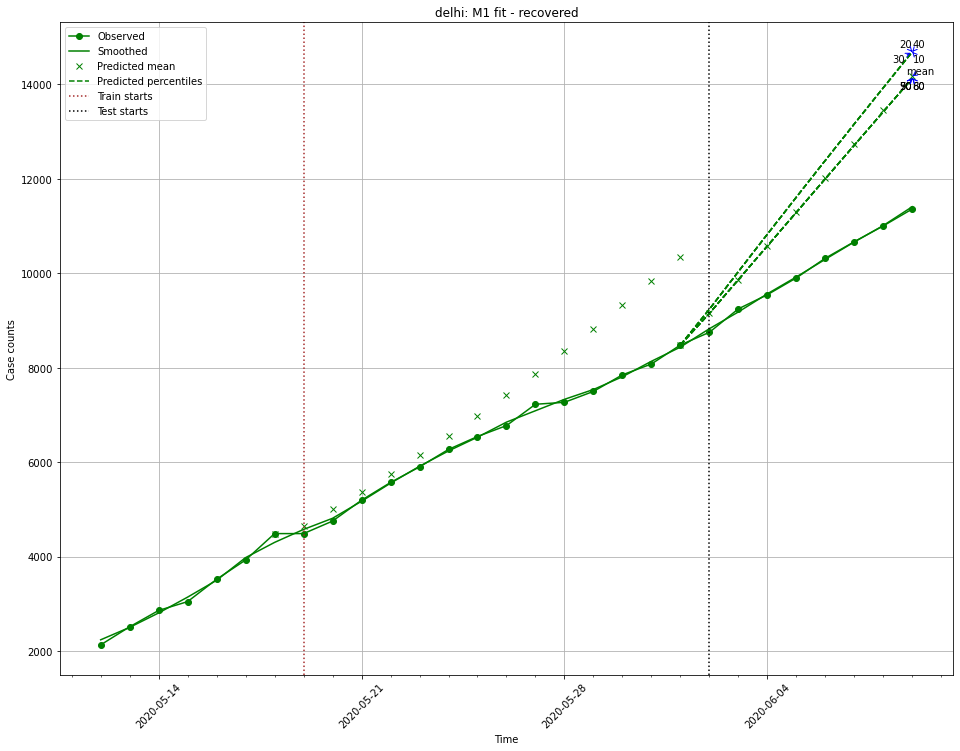

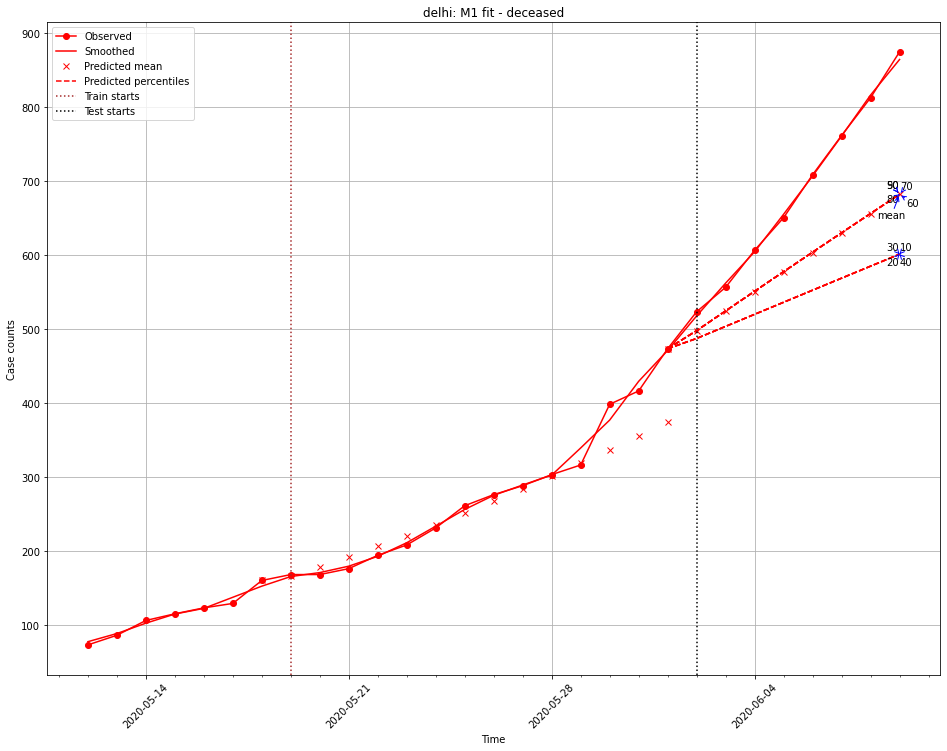

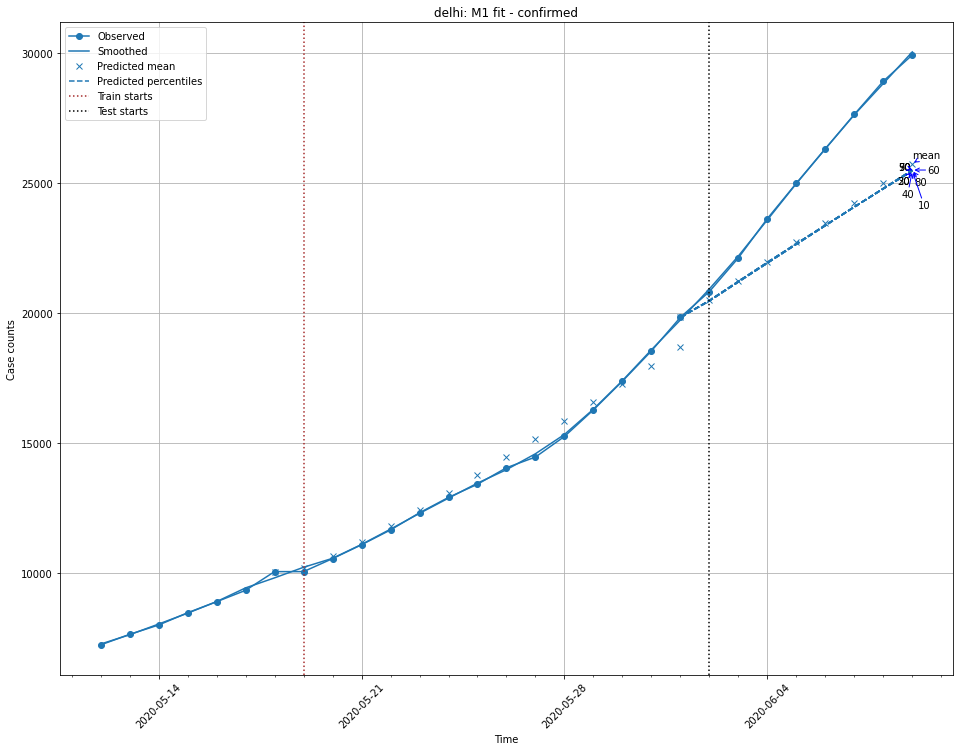

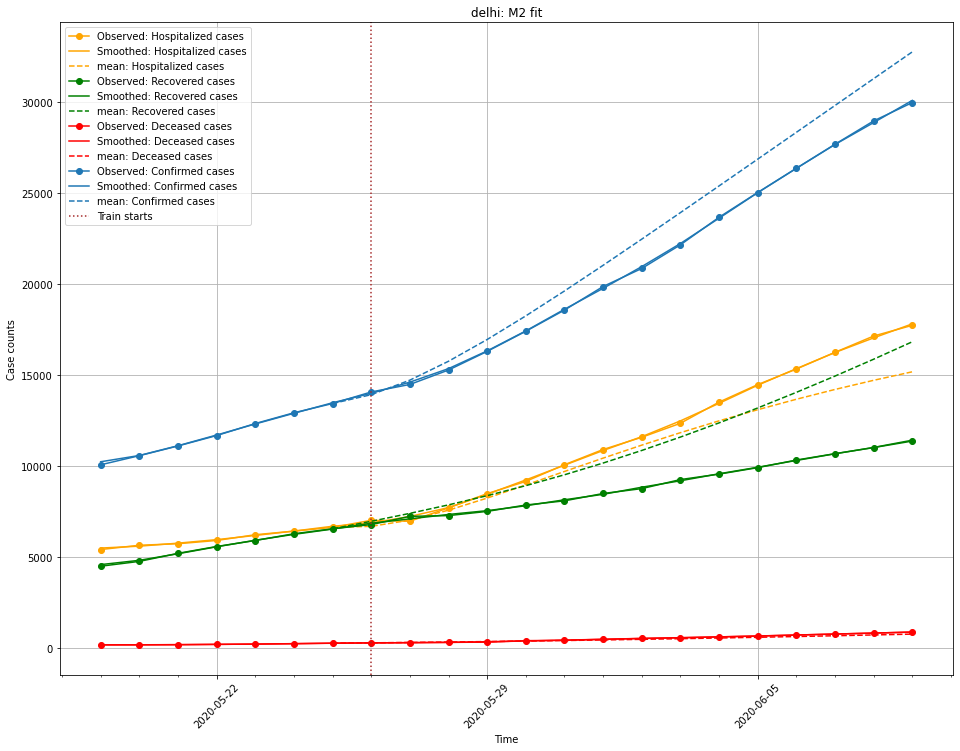

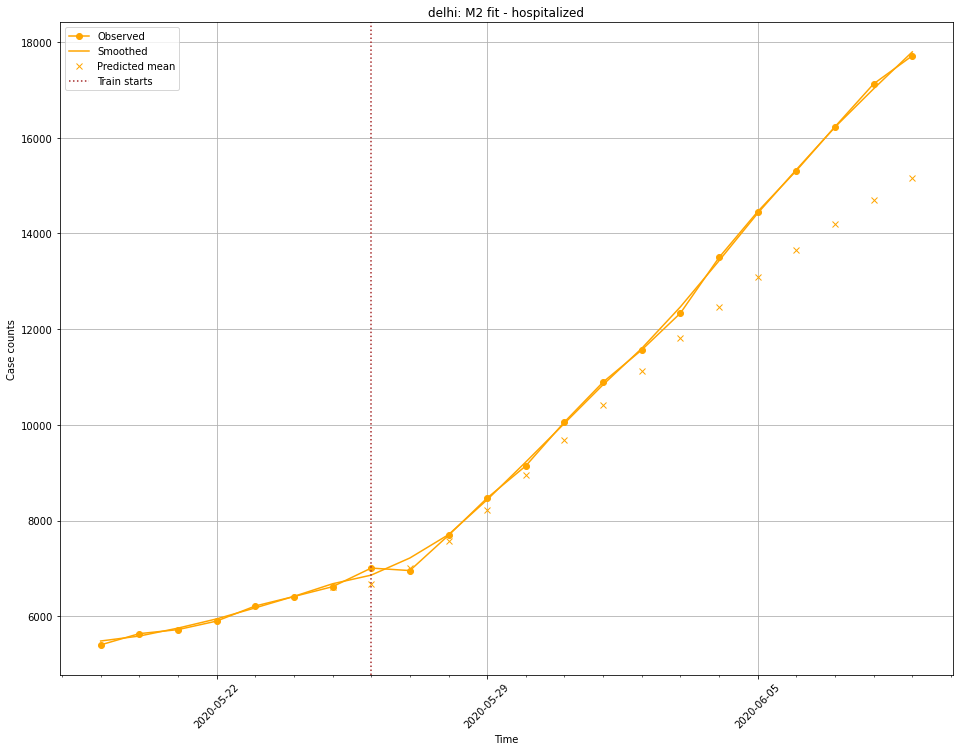

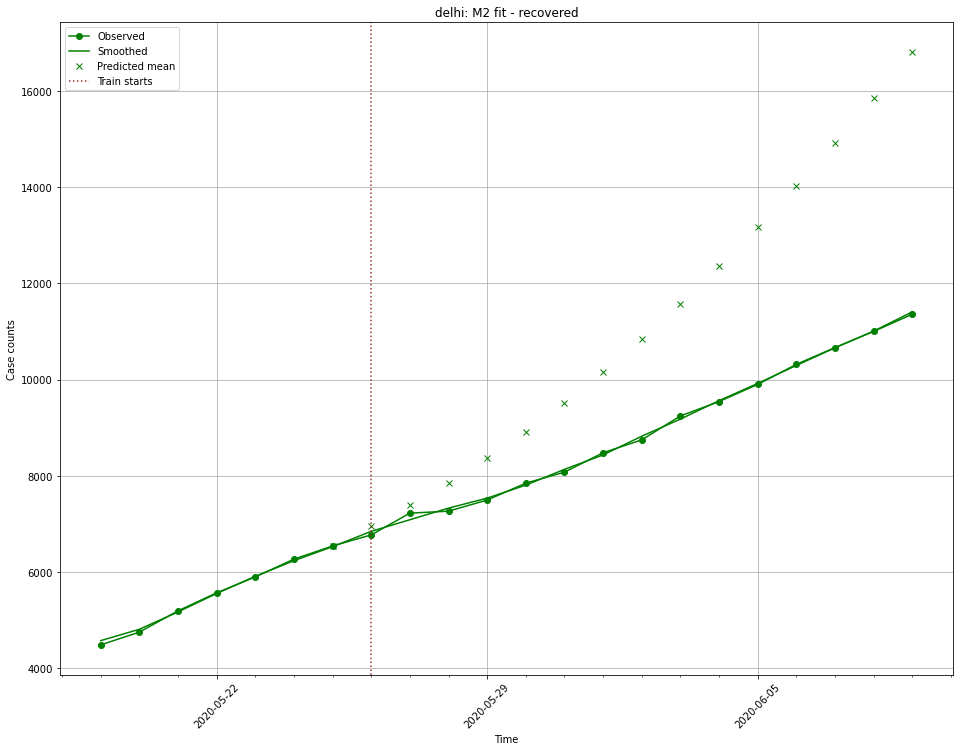

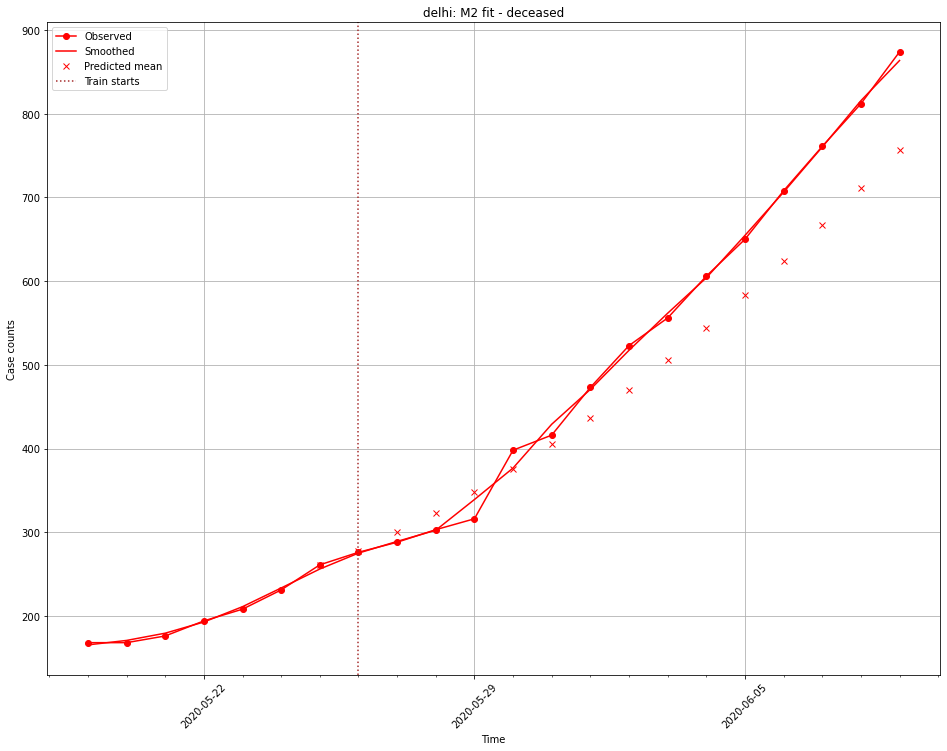

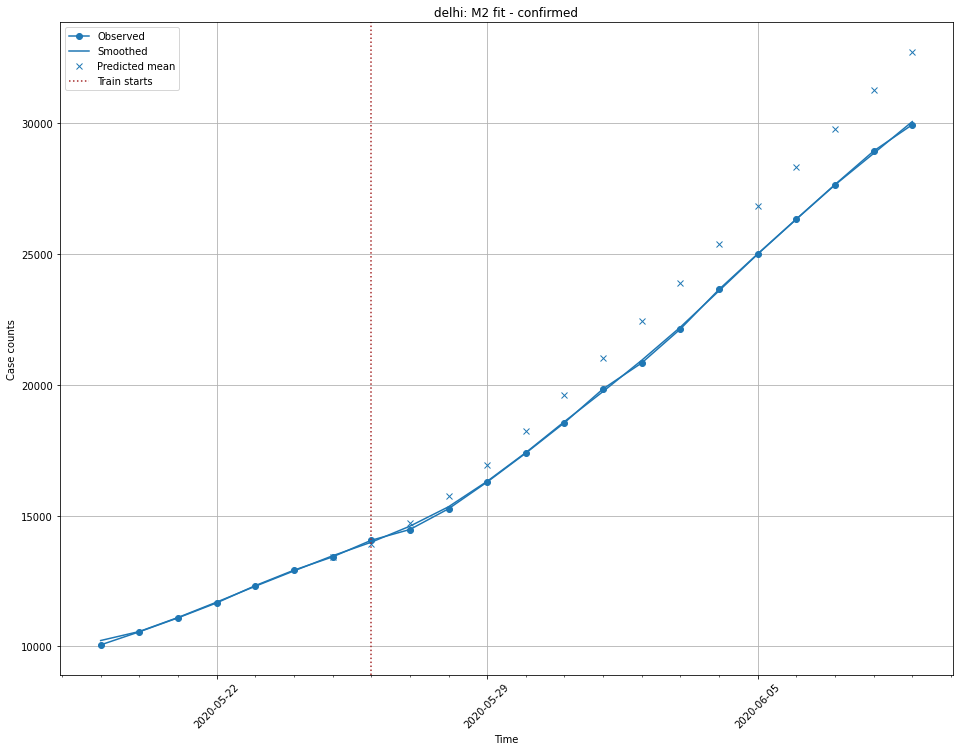

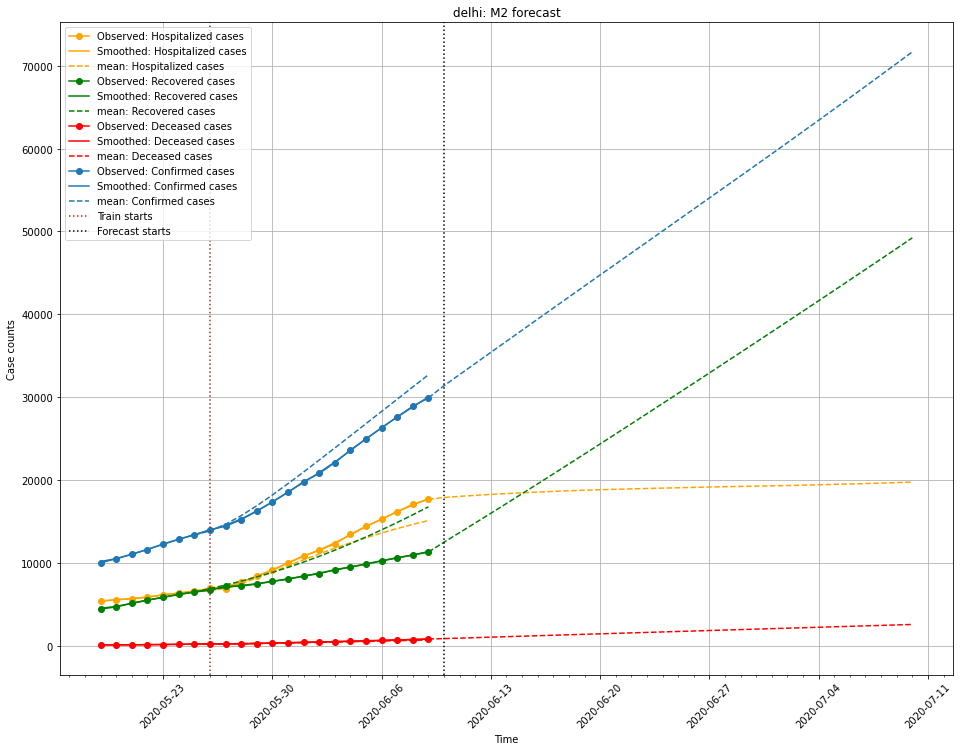

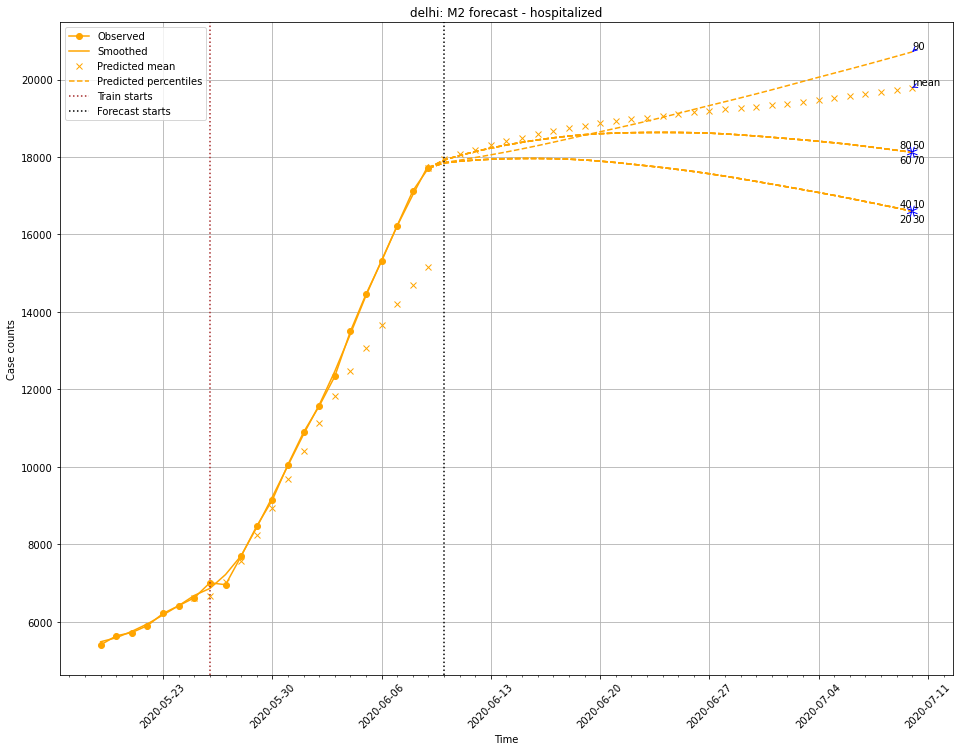

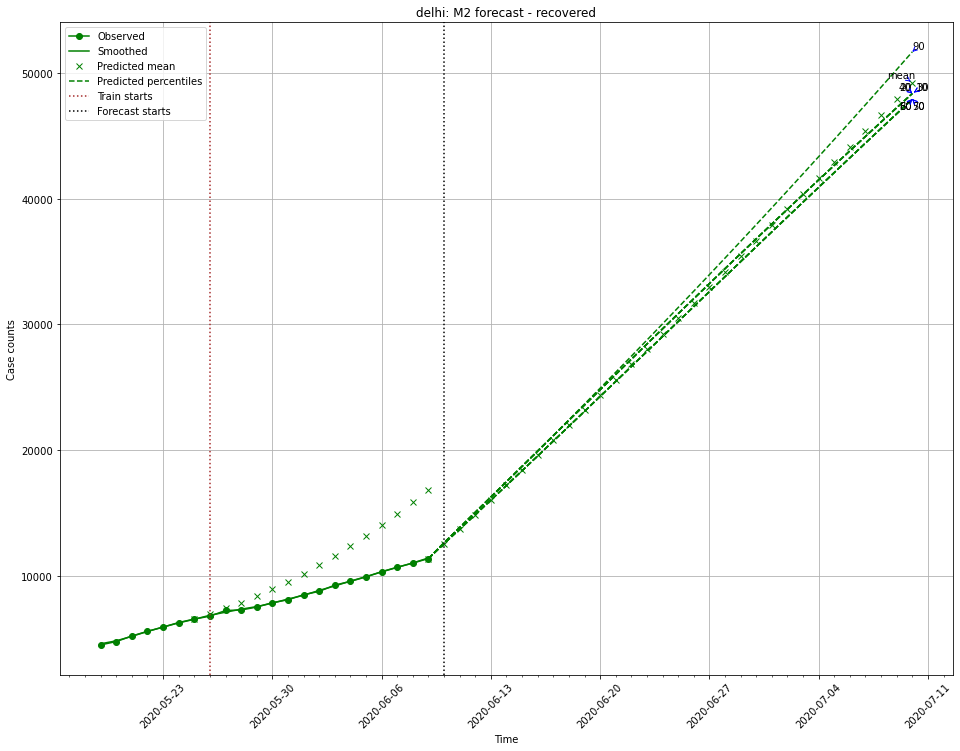

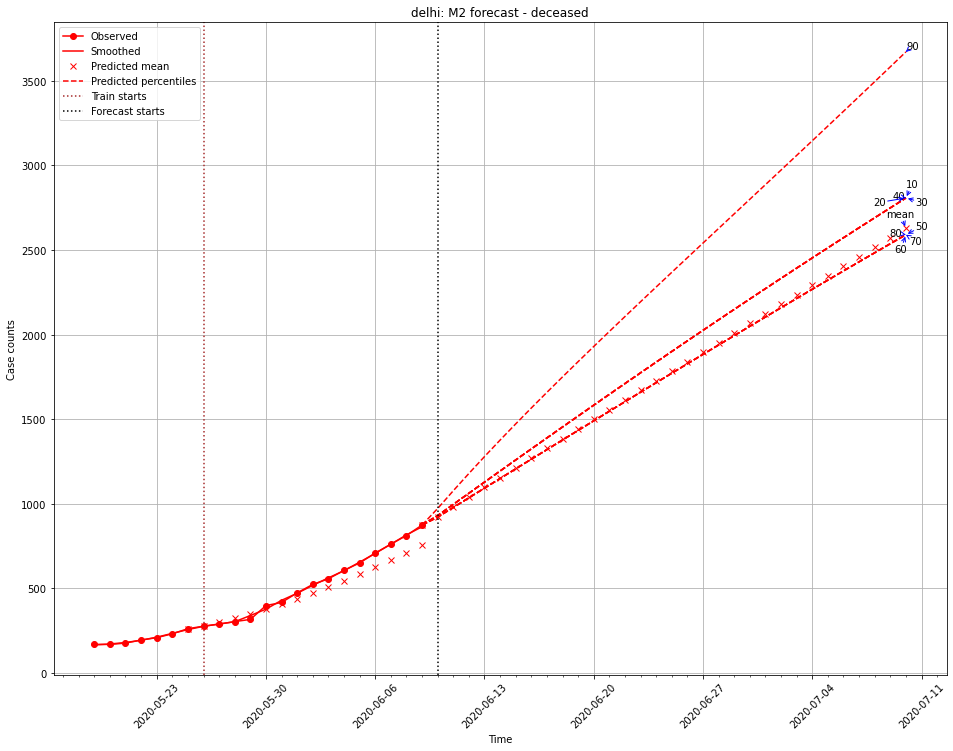

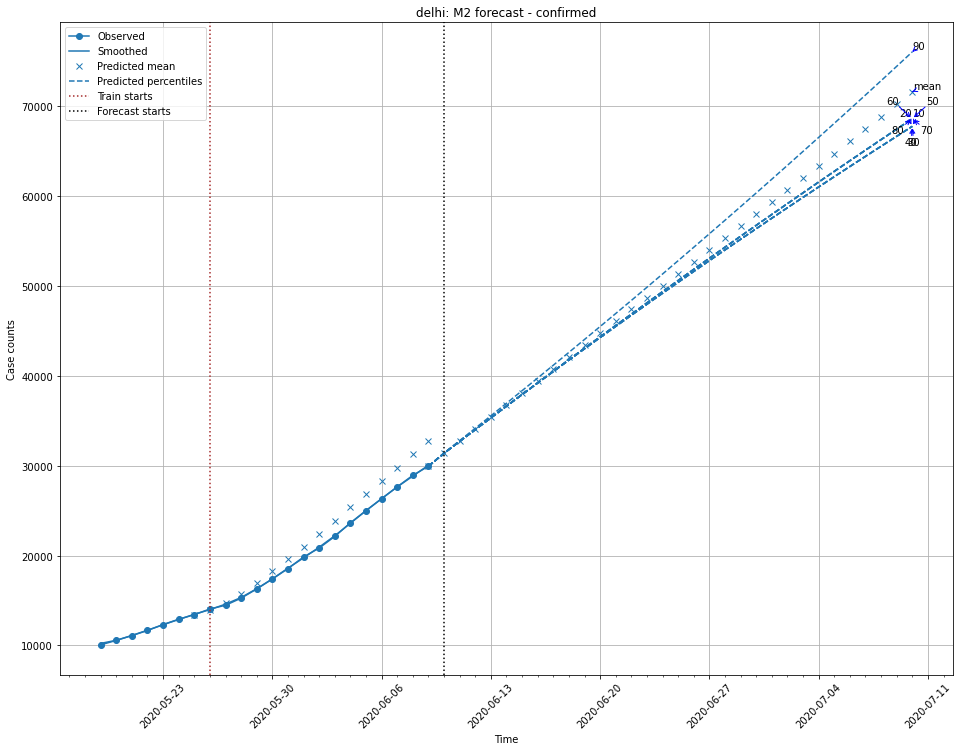

In [9]:
# remove max_evals here, it doesn't work
train_eval_plot_ensemble(region, region_type, 
                         current_day, forecast_length,
                         default_train_config, default_test_config, default_forecast_config,
                         train_period = 14, test_period = 7,
                         max_evals = 100, data_source = 'rootnet_stats_history', 
                         mlflow_log = False, mlflow_run_name = "Ensemble testing")